In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

# Load the KMNIST dataset

In [12]:
# Load the training and test data from the .npz files
with np.load('kmnist-train-imgs.npz') as f:
    x_train = f['arr_0']
with np.load('kmnist-test-imgs.npz') as f:
    x_test = f['arr_0']
with np.load('kmnist-train-labels.npz') as f:
    y_train = f['arr_0']
with np.load('kmnist-test-labels.npz') as f:
    y_test = f['arr_0']

FileNotFoundError: [Errno 2] No such file or directory: 'kmnist-train-imgs.npz'

# Preprocess the data

In [ ]:
# Normalize the image data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the image data to include a channel dimension for the CNN
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Create a CNN model

In [ ]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

In [13]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = model.fit(
    x_train, 
    y_train, 
    epochs=200, 
    validation_data=(x_test, y_test), 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

NameError: name 'x_train' is not defined

In [100]:
# Define the CNN model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='tanh'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='tanh'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='tanh'),
#     tf.keras.layers.Dense(128, activation='tanh'),
#     tf.keras.layers.Dense(51, activation='softmax')
# ])

# Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping()
# history = model.fit(
#     x_train, 
#     y_train, 
#     epochs=200, 
#     validation_data=(x_test, y_test), 
#     batch_size=40, 
#     verbose=2,
#     callbacks=[early_stopping]
# )

# Evaluate the model

In [101]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 3s - loss: 0.4070 - accuracy: 0.8795 - 3s/epoch - 9ms/step
Test accuracy: 0.8794999718666077


In [102]:
def get_lable_color(val1, val2):
    if val1 == val2:
        return 'black'
    else:
        return 'red'
predictions = model.predict(x_test)
prediction_digits = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 9ms/step


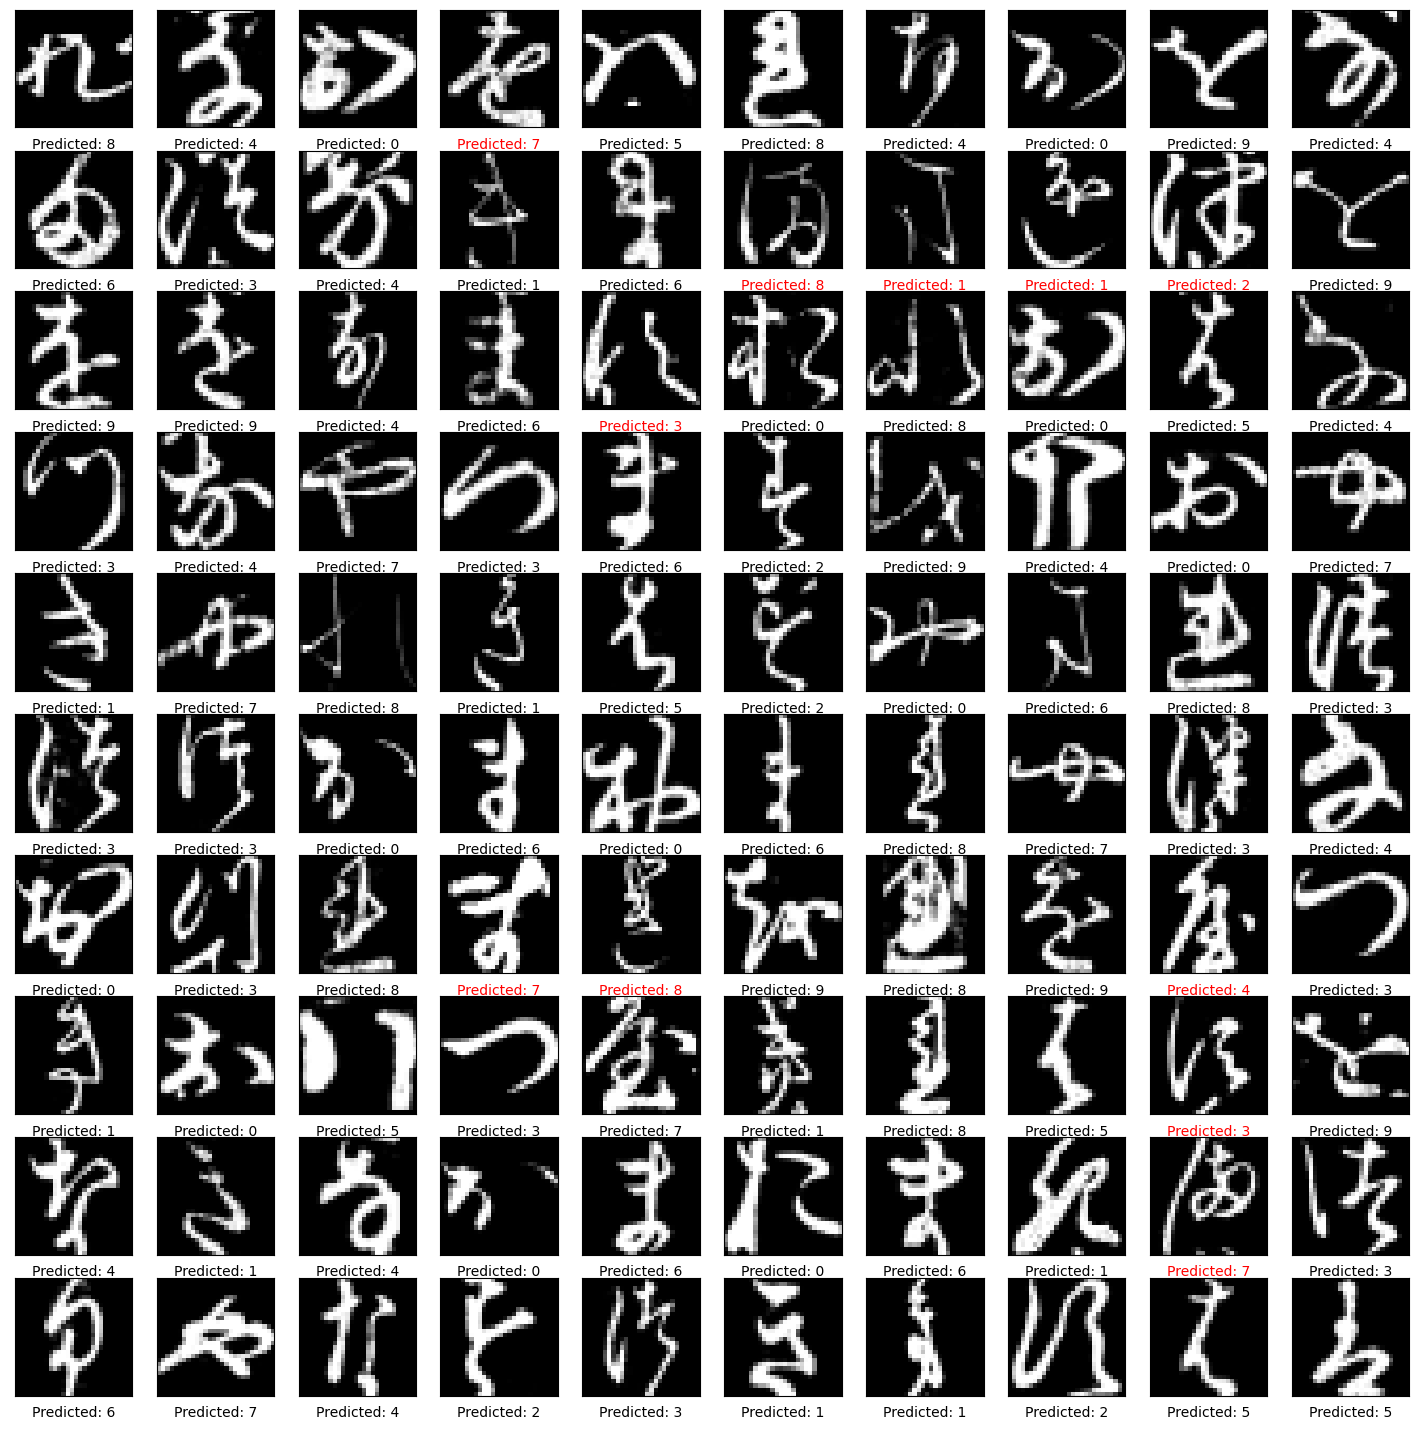

In [103]:
import random
plt.figure(figsize=(18, 18))
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_index = random.randint(0, len(prediction_digits))
    plt.imshow(x_test[image_index], cmap=plt.cm.gray)
    ax.xaxis.label.set_color(get_lable_color(prediction_digits[image_index],\
    y_test[image_index]))
    plt.xlabel('Predicted: %d'% prediction_digits[image_index])
plt.show()

# Make Predictions

In [104]:
# Define a list of hiragana characters
hiragana = ['あ', 'い', 'う', 'え', 'お', 'か', 'き', 'く', 'け', 'こ', 'さ', 'し', 'す', 'せ', 'そ', 'た', 'ち', 'つ', 'て', 'と', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ひ', 'ふ', 'へ', 'ほ', 'ま', 'み', 'む', 'め', 'も', 'や', 'ゆ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'わ', 'を', 'ん']
# Make predictions on a sample of test images
predictions = model.predict(x_test[:10])

1/1 [==============================] - 0s 42ms/step


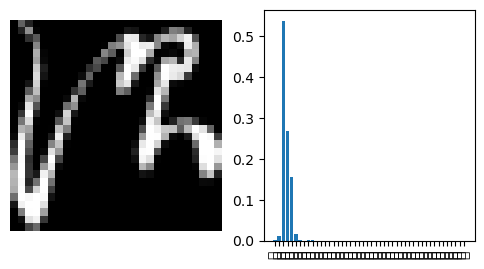

Predicted character: う


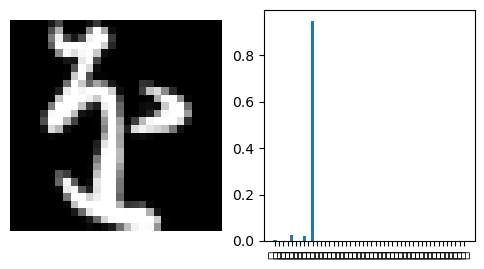

Predicted character: こ


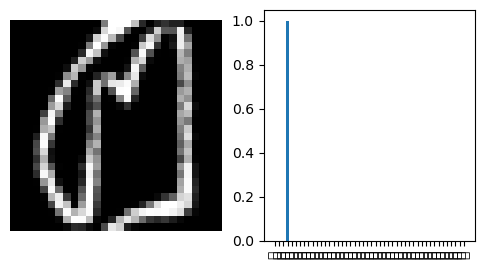

Predicted character: え


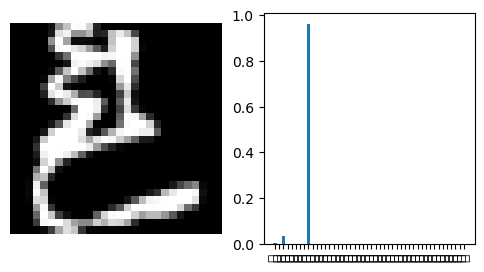

Predicted character: け


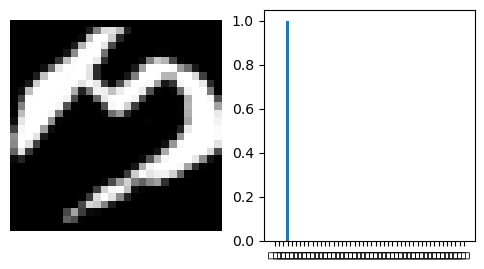

Predicted character: え


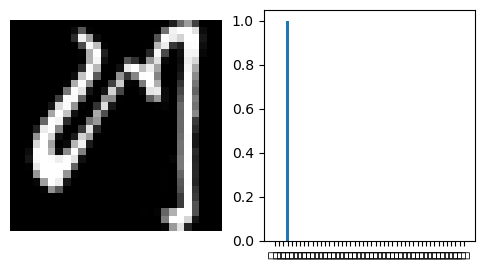

Predicted character: え


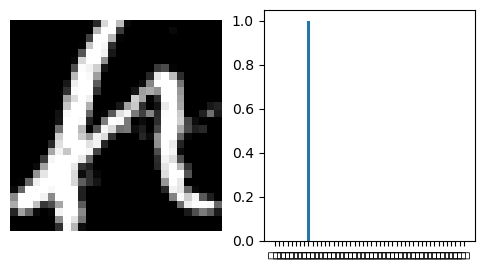

Predicted character: け


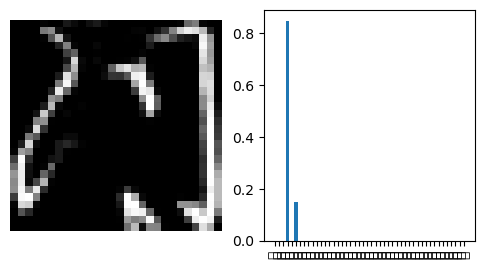

Predicted character: え


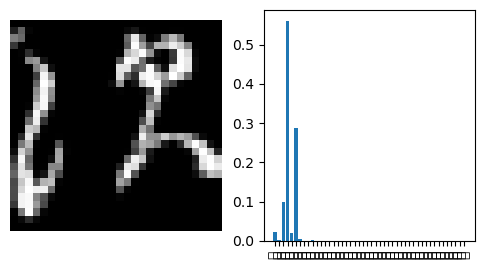

Predicted character: え


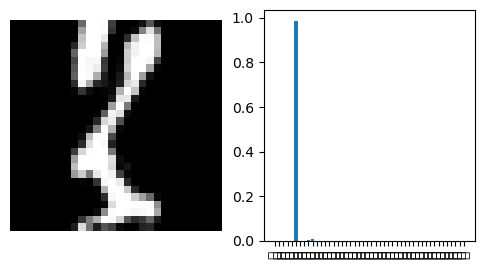

Predicted character: か


In [105]:
# Plot the predicted characters and the corresponding images
for i in range(10):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.bar(range(46), predictions[i])
    plt.xticks(range(46), hiragana, rotation=90)
    plt.show()
    predicted_class = np.argmax(predictions[i])
    predicted_char = hiragana[predicted_class]
    print("Predicted character:", predicted_char)

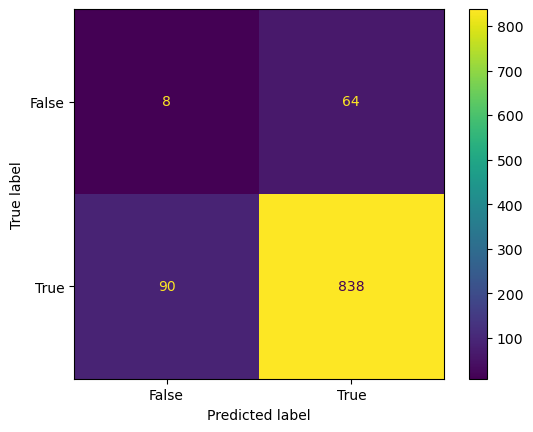

In [1]:
import numpy

actual = numpy.random.binomial(1, 0.9, size = 1000)
predicted = numpy.random.binomial(1, 0.9, size = 1000)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [14]:
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
F1_score = metrics.f1_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.846, 'Precision': 0.9290465631929047, 'Sensitivity_recall': 0.9030172413793104, 'Specificity': 0.1111111111111111, 'F1_score': 0.9158469945355191}
